## Visualizing Bike Sharing Data

**Importing Packages**

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Wrangling the Data**

In [482]:
#read in the CSV
df_raw = pd.read_csv('bike_sharing_by_hour.csv')
#convert the weekday numbers into appropriate names
df_raw['weekday_name'] = df_raw['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',
                                                     4:'Thursday',5:'Friday',6:'Saturday'})
#convert the holiday binary variables into an appropriate name
df_raw['holiday_name'] = df_raw['holiday'].replace({0:'Working Day',1:'Holiday'})
#convert the month numbers into appropriate names
df_raw['mnth_name'] = df_raw['mnth'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                              7:'July',8:'August',9:'September',10:'October',11:'November',
                                              12:'December'})
#convert the weather situation numbers into appropriate names
df_raw['weathersit_name'] = df_raw['weathersit'].replace({1: 'Clear, Few clouds, Partly cloudy', 2:'Misty and Cloudy', 
                             3: 'Light Precipitation', 4: 'Heavy Precipitation'})
#convert the season numbers into appropriate names
df_raw['season_name'] = df_raw['season'].replace({1:'Winter',2:'Spring',3:'Summer',4:'Fall'})

Some initial hypotheses:
1. There will be some interesting nonlinear/decision-tree-esque relationships here. For example, holidays may increase bike traffic only if the temperature is above a certain value. Or, warm weather may increase bike traffic only if the humidity is below a certain threshold. A linear regression will probably have trouble finding these more complex relationships.
2. I expect winter months to be lower than the other months. We need to check to make sure our data is reasonably stationary. There may be a slight upward trend in popularity over time as more people became aware of the bikes, a factor not related to any of the features in the dataset.
3. Work days vs. weekends, which are more popular?
4. Bad weather (weathersit) probably makes for less ridership.
5. Temperature, feeling temperature, humidity all probably have nonlinear impacts on overall ridership. There are a lot of interesting dependencies here.
6. My inclination is that registered riders use the bikes more often during the week in the mornings and evenings, while casual riders use the bikes (relatively) more often during the weekend and holidays.

There are no missing values:

In [483]:
df_raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [484]:
df_raw.drop('instant',axis=1,inplace=True)

**Data Visualization**

Year 1: The summer is the most popular time, followed by spring and fall, followed by winter:

Text(0,0.5,'Average Rider Count')

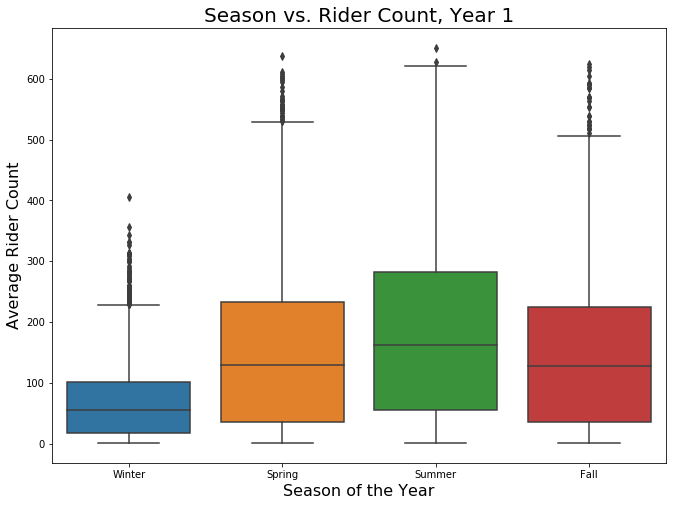

In [485]:
#set the dimensions
dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)
#creat the boxplot
box = sns.boxplot(x='season_name', y='cnt', data=df_raw[df_raw['yr']==0])
box.axes.set_title('Season vs. Rider Count, Year 1',fontsize=20)
box.set_xlabel('Season of the Year',fontsize=16)
box.set_ylabel('Average Rider Count',fontsize=16)

Year 2: The summer is also the most popular month, followed by and fall, and then winter. Notice that ridership in this year is about 1.5 times the higher than the ridership in the prior year. This is a trend we would have to control for if we were to do a predictive modeling problem:

Text(0,0.5,'Average Rider Count')

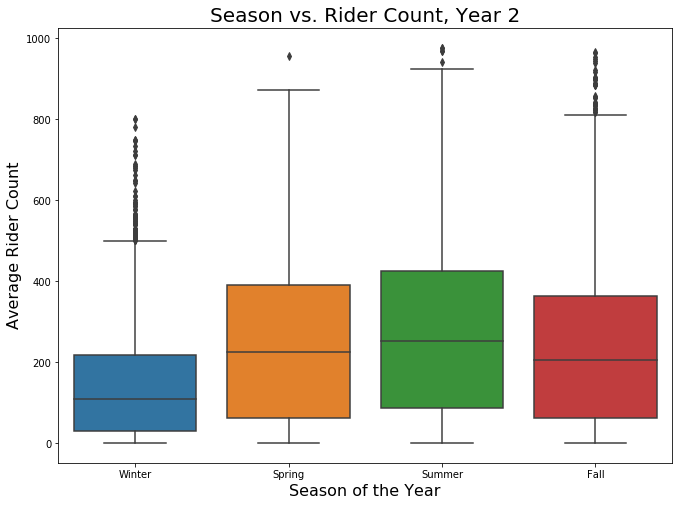

In [463]:
#set the dimensions
dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)
#create the boxplot
box = sns.boxplot(x='season_name', y='cnt', data=df_raw[df_raw['yr']==1])
box.axes.set_title('Season vs. Rider Count, Year 2',fontsize=20)
box.set_xlabel('Season of the Year',fontsize=16)
box.set_ylabel('Average Rider Count',fontsize=16)

All years: the more severe the weather, the less the average rider counts. Again, this is pretty intuitive:

Text(0,0.5,'Average Rider Count')

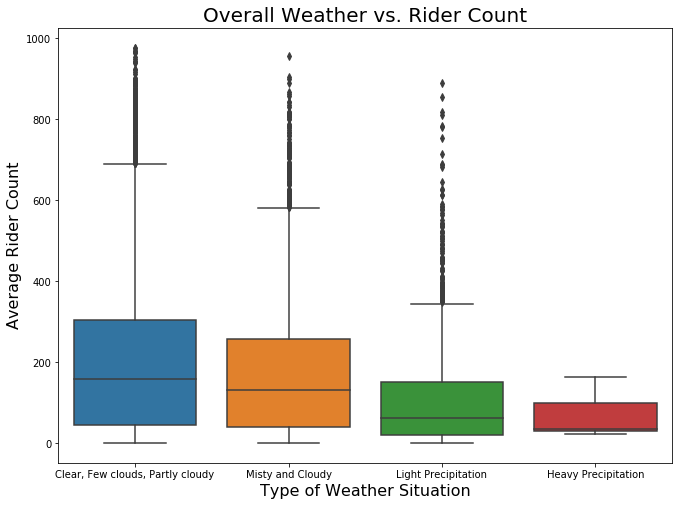

In [464]:
#set the dimensions
dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)
#create the boxplot
box = sns.boxplot(x='weathersit_name', y='cnt', data=df_raw)
box.axes.set_title('Overall Weather vs. Rider Count',fontsize=20)
box.set_xlabel('Type of Weather Situation',fontsize=16)
box.set_ylabel('Average Rider Count',fontsize=16)

Conclusions from the following charts:
1. The warmer months are distinctly more popular than the colder months for riding bikes. This makes sense.
2. Ridership by hour doesn't seem to depend upon season. There is a pretty clear "two peak" effect (morning and afternoon demand) for all seasons.
3. It appears that weekday ridership peaks between 7 and 9 AM in the morning and 4 and 6 PM at night. On the weekends, the ridership is almost flipped and peak ridership is from 10 AM to 4 PM. Controlling for the day of the week (either a feature for each day or a dummy variable for weekend or not weekend) would be necessary in a model. 
4. Casual riders have a different usage behavior than registered riders. It appears registered riders are registered because they use the bikes quite a bit - probably for their commute. This is why their ridership pattern has the "two peak" shape. Casual riders, on the other hand, seem to use the bikes on a one-off basis - probably on the weekends. It's probably helpful to build a model predicting casual usage and registered usage (since their behaviors are different). We could add together the two groups to then get total usage. 

[Text(0,0.5,'Rider Count'),
 Text(0.5,0,'Hour of the Day'),
 Text(0.5,1,'Average Rider Count by Hour of the Day Across User Type'),
 None]

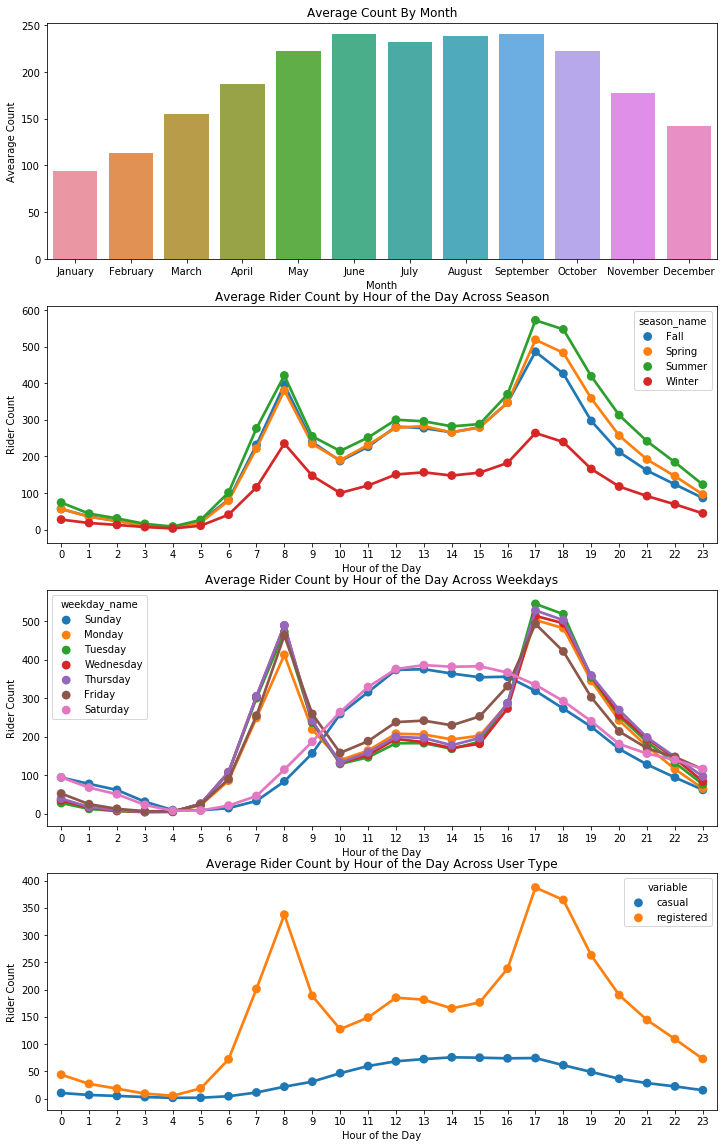

In [465]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ['January','February','March','April','May','June','July','August','September','October','November',
             'December']
hueOrder = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

monthAggregated = pd.DataFrame(df_raw.groupby('mnth_name')['cnt'].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by='cnt',ascending=False)
sns.barplot(data=monthSorted,x='mnth_name',y='cnt',ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(df_raw.groupby(['hr','season_name'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated['hr'], y=hourAggregated['cnt'],hue=hourAggregated['season_name'], 
              data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour of the Day', ylabel='Rider Count',title='Average Rider Count by Hour of the Day Across Season',
        label='big')


hourAggregated = pd.DataFrame(df_raw.groupby(['hr','weekday_name'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated['hr'], y=hourAggregated['cnt'],hue=hourAggregated['weekday_name'],
              hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour of the Day', ylabel='Rider Count',title='Average Rider Count by Hour of the Day Across Weekdays',
        label='big')

hourTransformed = pd.melt(df_raw[['hr','casual','registered']], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(['hr','variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hourAggregated['hr'], y=hourAggregated['value'],hue=hourAggregated['variable'],hue_order=['casual',
                                                                                                          'registered'], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour of the Day', ylabel='Rider Count',title='Average Rider Count by Hour of the Day Across User Type',
        label='big')

Let's look at the relationship between other weather variables and casual rider counts. Casual riders are less likely to be commuters, which means various environmental factors are more likely to impact their decision to rent a bike. There appears to be a positive relationship between temperature and rider counts, although extremely high temperatures are a negative impact:

Text(0.5,1.01,'Temperature vs. Rider Count')

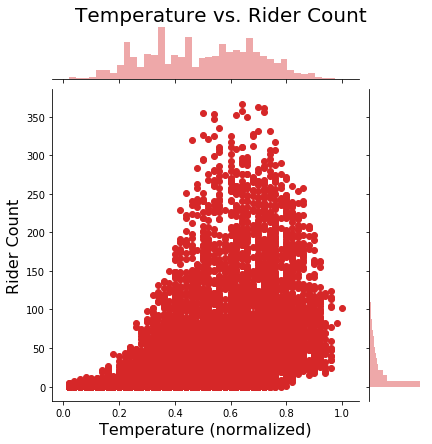

In [466]:
sns.jointplot(x=df_raw['temp'], y=df_raw['casual'], 
              kind='scatter',color = 'tab:red').set_axis_labels('Temperature (normalized)', 'Rider Count',
                                              fontsize=16).fig.suptitle('Temperature vs. Rider Count',fontsize=20,y=1.01)
#ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")


There is a negative relationship between wind speed and rider counts. Higher wind speeds are probably correlated with worse weather conditions. Not surprisingly, casual riders are less likely to rent during these periods:

Text(0.5,1.01,'Wind Speed vs. Rider Count')

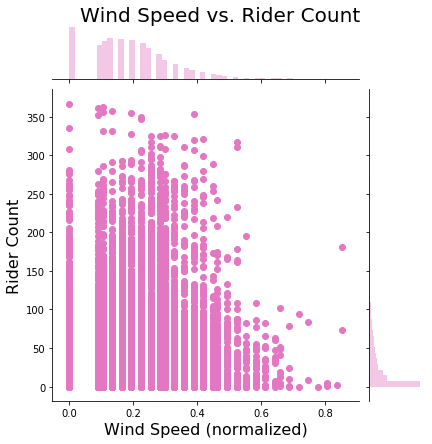

In [467]:
sns.jointplot(x=df_raw['windspeed'], y=df_raw['casual'], 
              kind='scatter',color = 'tab:pink').set_axis_labels('Wind Speed (normalized)', 'Rider Count',
                                              fontsize=16).fig.suptitle('Wind Speed vs. Rider Count',fontsize=20,y=1.01)

There is a slight negative relationship between humidity and rider counts. This relationship is probably different depending on temperature, i.e. the higher the temperature, the more a higher humidity negatively impacts rider counts. In fact, higher humidity may be a positive for rider counts at lower temperatures:

Text(0.5,1.01,'Humidity vs. Rider Count')

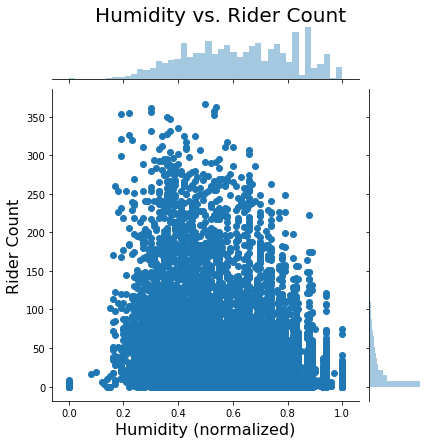

In [468]:
sns.jointplot(x=df_raw['hum'], y=df_raw['casual'], 
              kind='scatter',color = 'tab:blue').set_axis_labels('Humidity (normalized)', 'Rider Count',
                                              fontsize=16).fig.suptitle('Humidity vs. Rider Count',fontsize=20,y=1.01)

From the following chart, it looks like holidays are in a sort of middle ground between weekdays and weekends. Not everyone takes off on holidays, and the small peaks during rush hour show there are still people using the service to commute. The peak from 10 AM to 4 PM still shows that the majority of individuals treat a holiday as a weekend:

[Text(0,0.5,'Rider Count'),
 Text(0.5,0,'Hour of the Day'),
 Text(0.5,1,'Average Rider Count by Hour of the Day Across Holidays'),
 None]

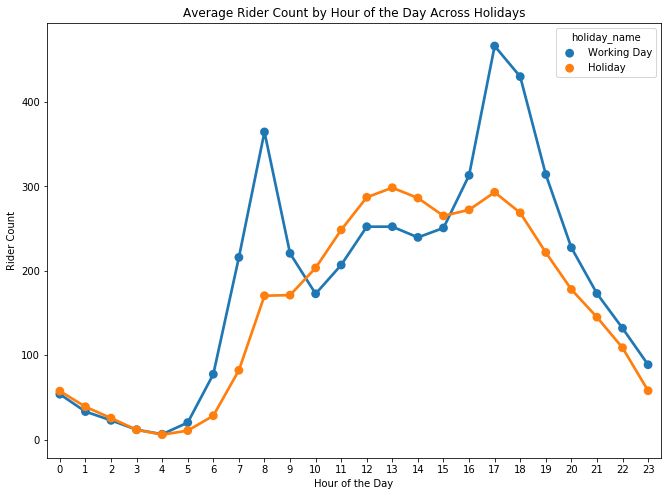

In [469]:
#set the dimensions
dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)
hueOrder_2 = ['Working Day','Holiday']
holidayAggregated = pd.DataFrame(df_raw.groupby(['hr','holiday_name'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=holidayAggregated['hr'], y=holidayAggregated['cnt'],hue=holidayAggregated['holiday_name'],
              hue_order=hueOrder_2, data=holidayAggregated, join=True,ax=ax)
ax.set(xlabel='Hour of the Day', ylabel='Rider Count',title='Average Rider Count by Hour of the Day Across Holidays',
        label='big')

**Creating Features**

Although we're not modeling anything yet in this notebook, let's prepare the data so that it could be effectively modeled.

**season:** The "season" variable is categorical, but isn't ordinal (i.e. there isn't really an optimal order for the seasons). We should therefore encode this variable with one-hot encoding to get 3 columns of appropriate dummy (0 or 1) variables:

In [470]:
#create this new feature
season_feature = pd.get_dummies(df_raw['season']).drop(4,axis=1).rename(columns={1:'winter',2:'spring',3:'summer'})

#merge in these new feature
df_raw = pd.concat([df_raw,season_feature],axis=1).drop('season',axis=1)

**weekday**: The "weekday" variable is also categorical and also not ordinal. We also need to encode this variable with one-hot encoding to get 6 columns of appropriate dummy (0 or 1) variables. Our dataset is pretty "long", so we shouldn't run into any dimensionality problems with creating these dummy variables:

In [471]:
#create this new feature
weekday_feature = pd.get_dummies(df_raw['weekday']).drop(6,axis=1).rename(columns={0:'sunday',1:'monday',2:'tuesday',
                                                                 3:'wednesday',4:'thursday',5:'friday'})
#merge in the new feature
df_raw = pd.concat([df_raw,weekday_feature],axis=1).drop('weekday',axis=1)

**weathersit**: The "weathersit" variable resembles the season and weekday variables as well. We'll encode it into 3 dummy variables:

In [472]:
#create this new feature
weathersit_feature = pd.get_dummies(df_raw['weathersit']).drop(4,axis=1).rename(columns={1:'clear_few_clouds',
                                                                                      2:'misty_cloudy',
                                                                                      3:'various_precipitation'})
#merge in the new feature
df_raw = pd.concat([df_raw,weathersit_feature],axis=1).drop('weathersit',axis=1)

**hr**: The "hour" variable could also be encoded with dummy variables, but there may be a better way to capture the cyclical nature of time. We can use a sine and cosine transformation together on the original raw feature in order to capture this effect:
https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

In [473]:
df_raw['sin_hr'] = np.sin(2*np.pi*df_raw['hr']/24)
df_raw['cos_hr'] = np.cos(2*np.pi*df_raw['hr']/24)

#not dropping the original column just yet

**mnth**: We can try the same thing with the "mnth" variable as we did with "hr", since it's also cyclical in nature:

In [474]:
df_raw['sin_mnth'] = np.sin(2*np.pi*df_raw['mnth']/12)
df_raw['cos_mnth'] = np.cos(2*np.pi*df_raw['mnth']/12)

#not dropping the original column just yet

**Final Dataset**

In [475]:
y = df_raw['cnt']
X = df_raw[['holiday','workingday','temp','atemp','hum','windspeed','winter','spring','summer','sunday','monday',
           'tuesday','wednesday','thursday','friday','clear_few_clouds','misty_cloudy','various_precipitation','sin_hr',
           'cos_hr','sin_mnth','cos_mnth']]

The y variable:

In [476]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

The X variables:

In [477]:
X.head()

,holiday,workingday,temp,atemp,hum,windspeed,winter,spring,summer,sunday,...,wednesday,thursday,friday,clear_few_clouds,misty_cloudy,various_precipitation,sin_hr,cos_hr,sin_mnth,cos_mnth
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,1,0,0,0.000000,1.000000,0.5,0.866025
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,1,0,0,0.258819,0.965926,0.5,0.866025
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,1,0,0,0.500000,0.866025,0.5,0.866025
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,1,0,0,0.707107,0.707107,0.5,0.866025
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,1,0,0,0.866025,0.500000,0.5,0.866025


**Final Important Considerations for this Data**

1. It makes more sense to build a model for casual and registered riders, since their behaviors seem different (registered are more likely to commute). Predicting total rider counts amounts to simply adding together the predictions for the two separate models. 
2. If we are trying to train a model to make meaningful predictions in the future, we actually can't use much of this data. Why? If we want to predict the number of riders at time t, then we need to know the weather (temperature, humidity, etc.) at time t. And if we need to wait until time t to make successful predictions for time t, then there is no point of making any predictions at all! Instead, it makes more sense to treat this as a time series problem. If we want to predict number of riders at time t and it's currently time t - 1, we can pull weather forecasts for time t and use those in our model to avoid lookahead bias. Variables describing whether time t is a holiday or weekday are still useful though since we always know them at time t - 1. 